<a href="https://colab.research.google.com/github/diegotluz/projects-colab/blob/main/Exemplo_CNN_Dataset_CIFAR10_com_Salvamento_no_GDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Carregando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import plot_model
from keras.utils import  to_categorical

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


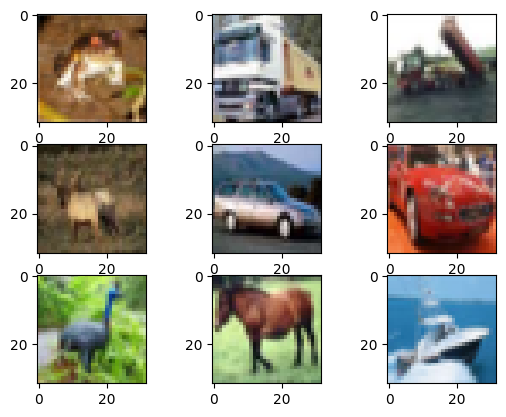

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [6]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [8]:
num_classes

10

In [9]:
x_train.shape

(50000, 32, 32, 3)

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [11]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [12]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [13]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [14]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))
# #model.add(Conv2D(32, (3,3)),  activation='relu', input_shape=(32, 32, 3)))

# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Flatten())

# model.add(Dense(32, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

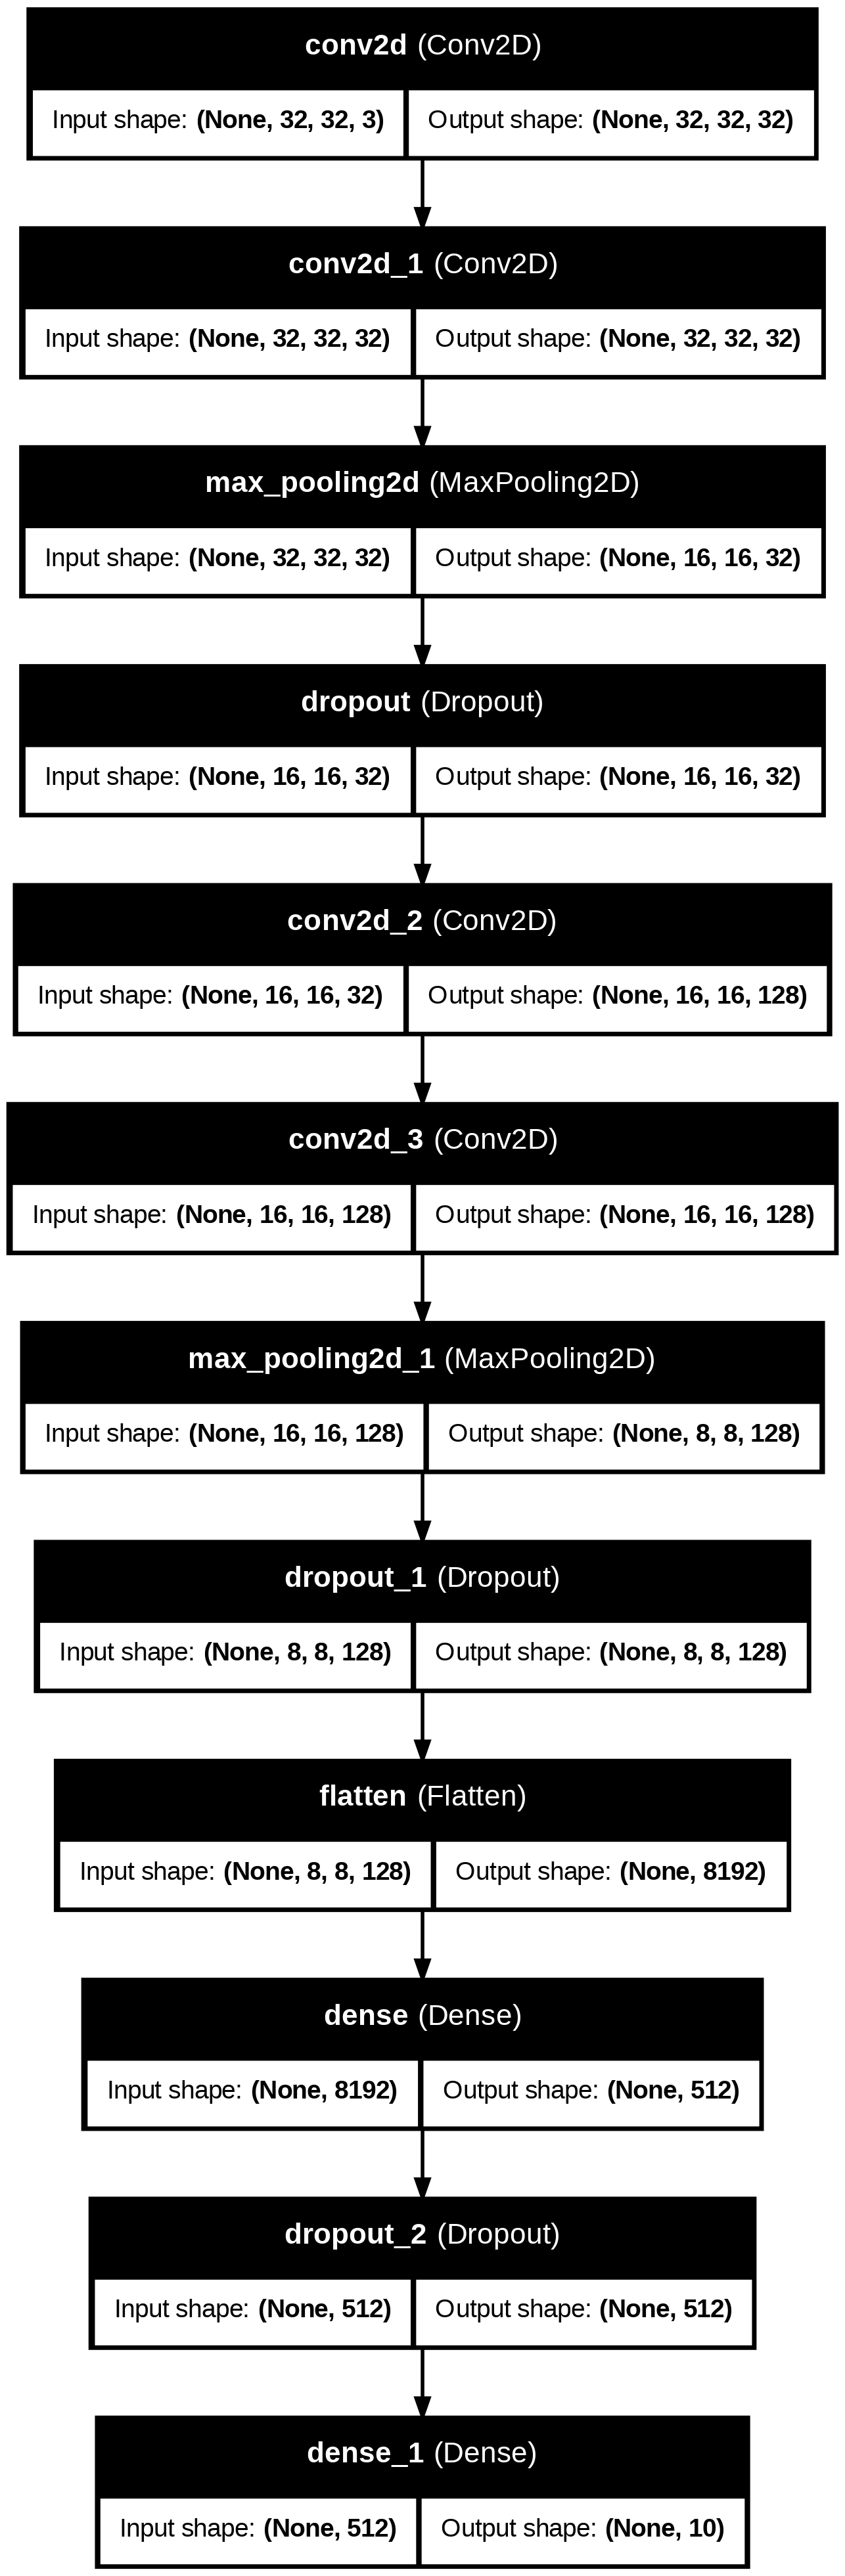

In [16]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,394,666 (16.76 MB)

 Trainable params: 4,394,666 (16.76 MB)

 Non-trainable params: 0 (0.00 B)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Treinando o modelo

In [19]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [20]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.keras', verbose=1,  save_best_only=True, monitor='val_accuracy') #

hist = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/20
447/450 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3033 - loss: 1.8767
Epoch 1: val_accuracy improved from -inf to 0.58420, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3042 - loss: 1.8744 - val_accuracy: 0.5842 - val_loss: 1.1675
Epoch 2/20
448/450 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5742 - loss: 1.1761
Epoch 2: val_accuracy improved from 0.58420 to 0.65680, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5743 - loss: 1.1757 - val_accuracy: 0.6568 - val_loss: 0.9810
Epoch 3/20
447/450 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6570 - loss: 0.9699
Epoch 3: val_accuracy improved from 0.65680 to 0.72020, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6571 - loss: 0.9697 - val_accuracy: 0.7202 - val_loss: 

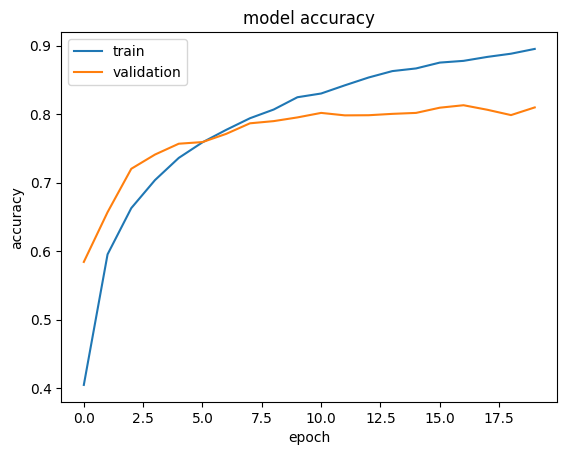

In [32]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [33]:
model = load_model("/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.keras")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.802299976348877


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [35]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [36]:
y_hat = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
y_hat

array([[6.7649835e-06, 1.4131456e-06, 4.7184740e-06, ..., 4.7918293e-06,
        1.0460355e-04, 4.3782858e-08],
       [2.3868165e-06, 3.6812842e-02, 5.6366035e-16, ..., 2.4300455e-20,
        9.6318471e-01, 4.0705206e-10],
       [5.5315576e-02, 1.3079188e-02, 1.7426370e-07, ..., 1.9064798e-07,
        9.3124270e-01, 3.5906557e-04],
       ...,
       [8.0626307e-08, 6.5318431e-09, 2.9152546e-02, ..., 2.8757649e-03,
        9.0385714e-07, 8.1470937e-09],
       [7.3475730e-01, 2.5319964e-01, 1.6212960e-04, ..., 1.9997728e-07,
        1.8315124e-05, 1.2741284e-05],
       [4.1684924e-12, 4.0104308e-15, 3.6937528e-10, ..., 9.9996352e-01,
        2.0455700e-16, 8.3347661e-15]], dtype=float32)

In [27]:
y_hat[100,:]

array([2.6192203e-05, 3.6556754e-11, 9.1963755e-03, 5.3205073e-04,
       7.9270005e-01, 6.7937919e-03, 5.0512188e-08, 1.9075070e-01,
       4.4598130e-07, 1.7044206e-07], dtype=float32)

In [38]:
np.argmax(y_hat[100,:])

4

In [39]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [40]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

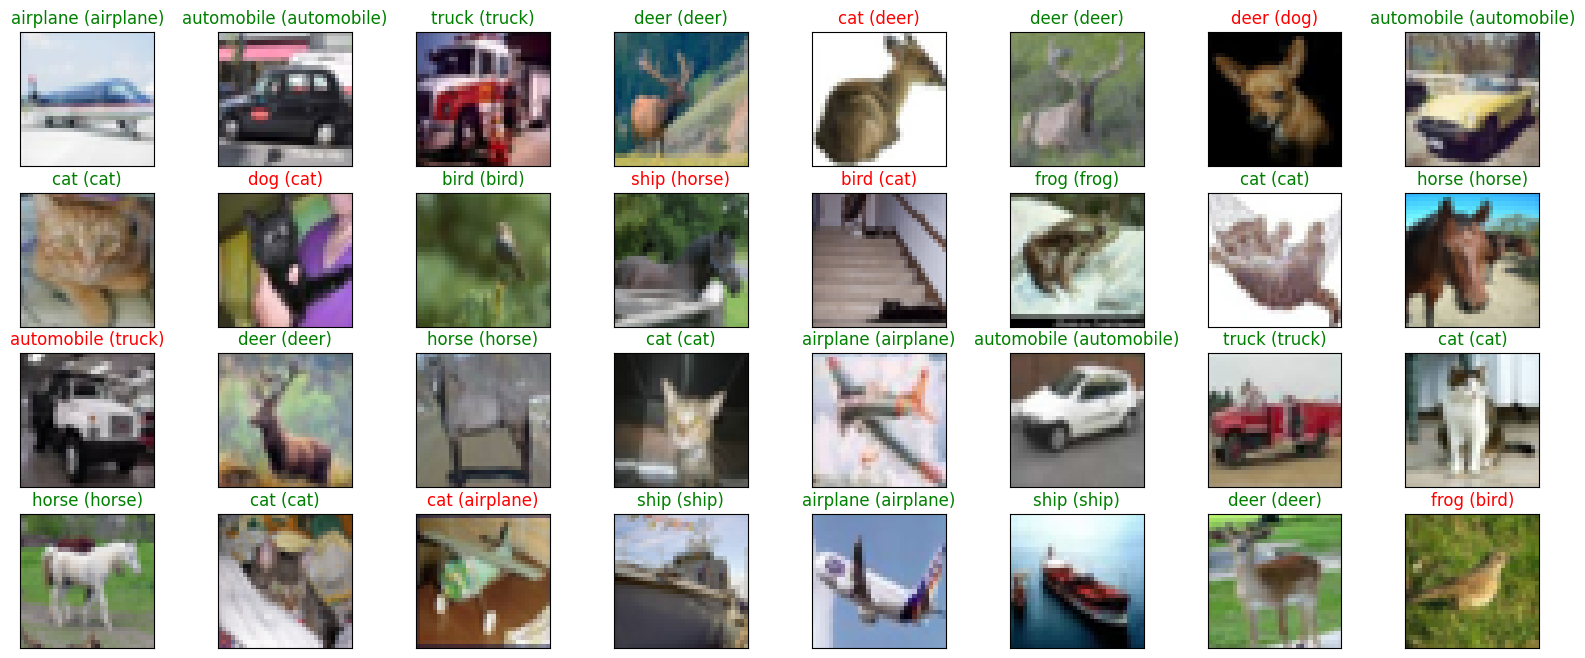

In [41]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
